## Assignment 6

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
sns.set(style="ticks")
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\Meet\Downloads\Test.csv')

In [3]:
df.sample(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
378,460214,Female,Yes,45,Yes,Engineer,0.0,Average,2.0,Cat_6,C
332,460095,Female,Yes,81,Yes,Lawyer,1.0,Low,1.0,Cat_6,D
417,460354,Female,No,37,Yes,Artist,3.0,Low,1.0,Cat_3,B
826,461747,Male,Yes,65,Yes,Artist,0.0,High,2.0,Cat_6,A
80,459227,Female,Yes,32,No,Engineer,9.0,Low,4.0,Cat_6,A


In [4]:
df.describe( include = ['O'])

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,2627,2577,2603,2589,2627,2595,2627
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,A
freq,1424,1520,1602,802,1616,1672,846


In [5]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB


In [7]:
df.shape

(2627, 11)

In [8]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64

### Filling in missing data

C:\Users\Meet\AppData\Local\Temp\ipykernel_6632\3724756866.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=40, ha="right")


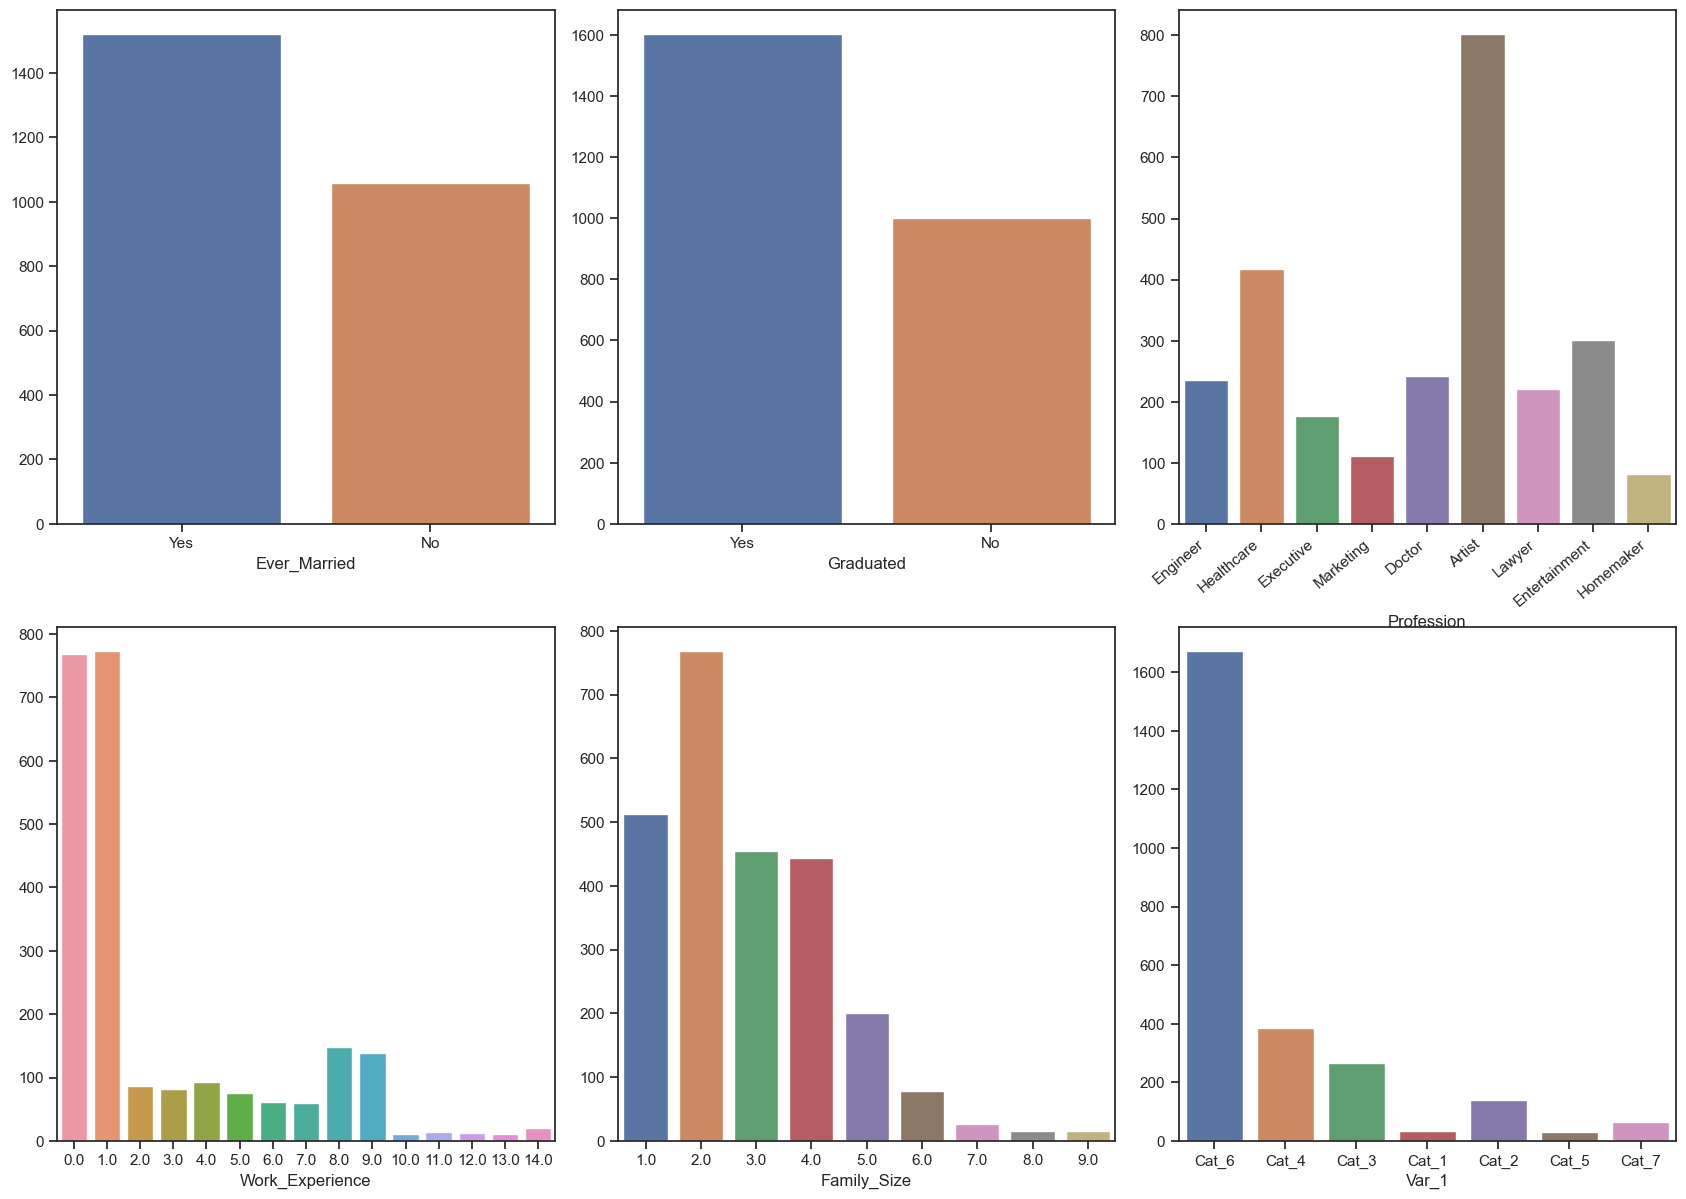

In [9]:
fig, ax =plt.subplots(2,3,figsize=(17,12))
fig.tight_layout()
ax=ax.flatten()
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=40, ha="right")
fig.subplots_adjust(hspace=0.2)

for i in range(6):
    sns.countplot(data=df,x=df.columns[df.isnull().any()][i], ax=ax[i])
    ax[i].set_ylabel('')

In [10]:
df = df.dropna(thresh=3)

In [11]:
#We consider that people can start working when they are over 15, so 25 years old people can't have more than 10 years of experience
df[(df['Age']<25) & (df['Work_Experience']>10)]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
893,461994,Male,Yes,20,No,Doctor,14.0,Low,2.0,Cat_6,B
2507,467570,Male,No,18,No,Healthcare,14.0,Low,NaN,Cat_6,A


In [12]:
df.drop(df[(df['Age']<25) & (df['Work_Experience']>10)].index,inplace=True)

In [13]:
df['Ever_Married'].ffill(inplace=True)
df['Graduated'].ffill(inplace=True)
df['Profession'].ffill(inplace=True)
df['Var_1'].ffill(inplace=True)
df['Work_Experience'].fillna(df['Work_Experience'].mean(),inplace=True)
df['Family_Size'].fillna(df['Family_Size'].mean(),inplace=True)

In [14]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [15]:
df['Work_Experience']=df['Work_Experience'].astype('int64')
df['Family_Size']=df['Family_Size'].astype('int64')

In [16]:
df_model = df.copy()

### Categorisation

In [17]:
df['Age_Group']=pd.cut(df.Age,bins=[18,35,60,90],labels=['Young Adult','Middle-Aged','Elderly'])
df['Work_Exp_Group'] = pd.cut(df.Work_Experience,bins=[0,1,7,15],labels=['Low-Exp','Med-Exp','High-Exp'])
df['Family_Size_Group'] = pd.cut(df.Family_Size,bins=[0,4,7,10],labels=['Small Family','Large Family','Joint Family'])
df.head(1)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Group,Work_Exp_Group,Family_Size_Group
0,458989,Female,Yes,36,Yes,Engineer,0,Low,1,Cat_6,B,Middle-Aged,NaN,Small Family


<AxesSubplot: >

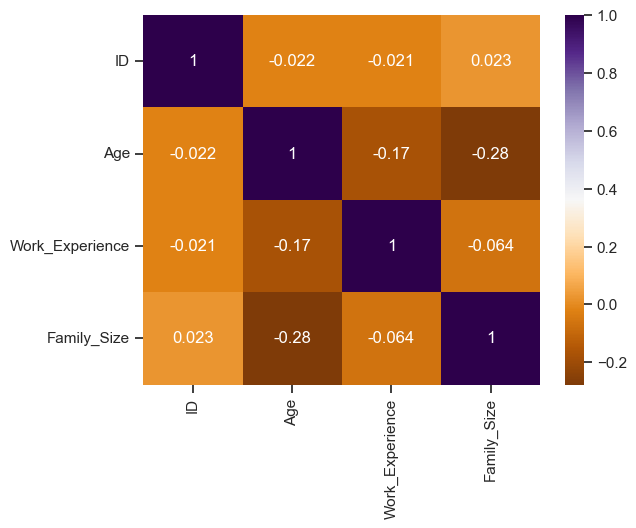

In [18]:
sns.heatmap(df.corr(),annot=True, cmap='PuOr')

<AxesSubplot: xlabel='Spending_Score'>

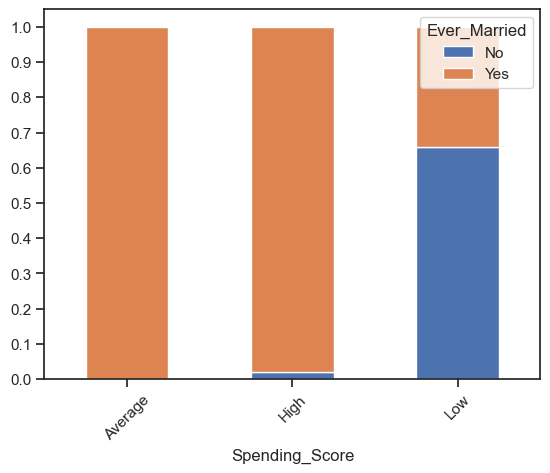

In [19]:
ax2 = df.pivot_table(columns='Ever_Married',index='Spending_Score',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)
ax2.plot(kind="bar",stacked=True,yticks=list(np.arange(0,1.1,0.1).round(2)),rot=45)

<AxesSubplot: xlabel='Profession'>

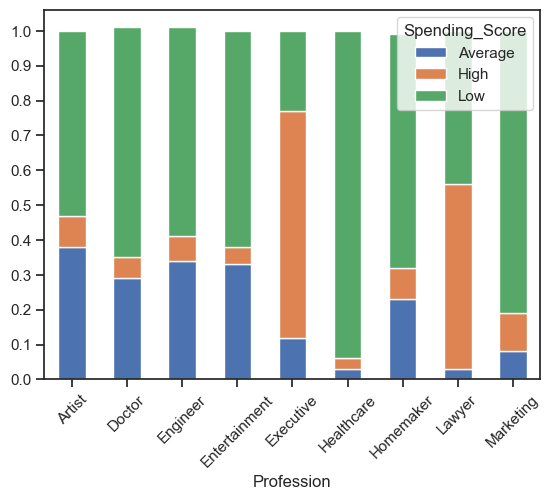

In [20]:
ax2 = df.pivot_table(columns='Spending_Score',index='Profession',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)
ax2.plot(kind="bar",stacked=True,yticks=list(np.arange(0,1.1,0.1).round(2)),rot=45)

<AxesSubplot: xlabel='Spending_Score'>

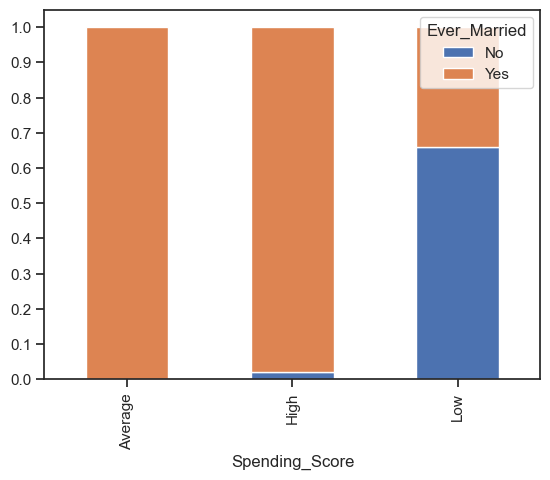

In [21]:
ax2 = df.pivot_table(columns='Ever_Married',index='Spending_Score',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)
ax2.plot(kind="bar",stacked=True,yticks=list(np.arange(0,1.1,0.1).round(2)))

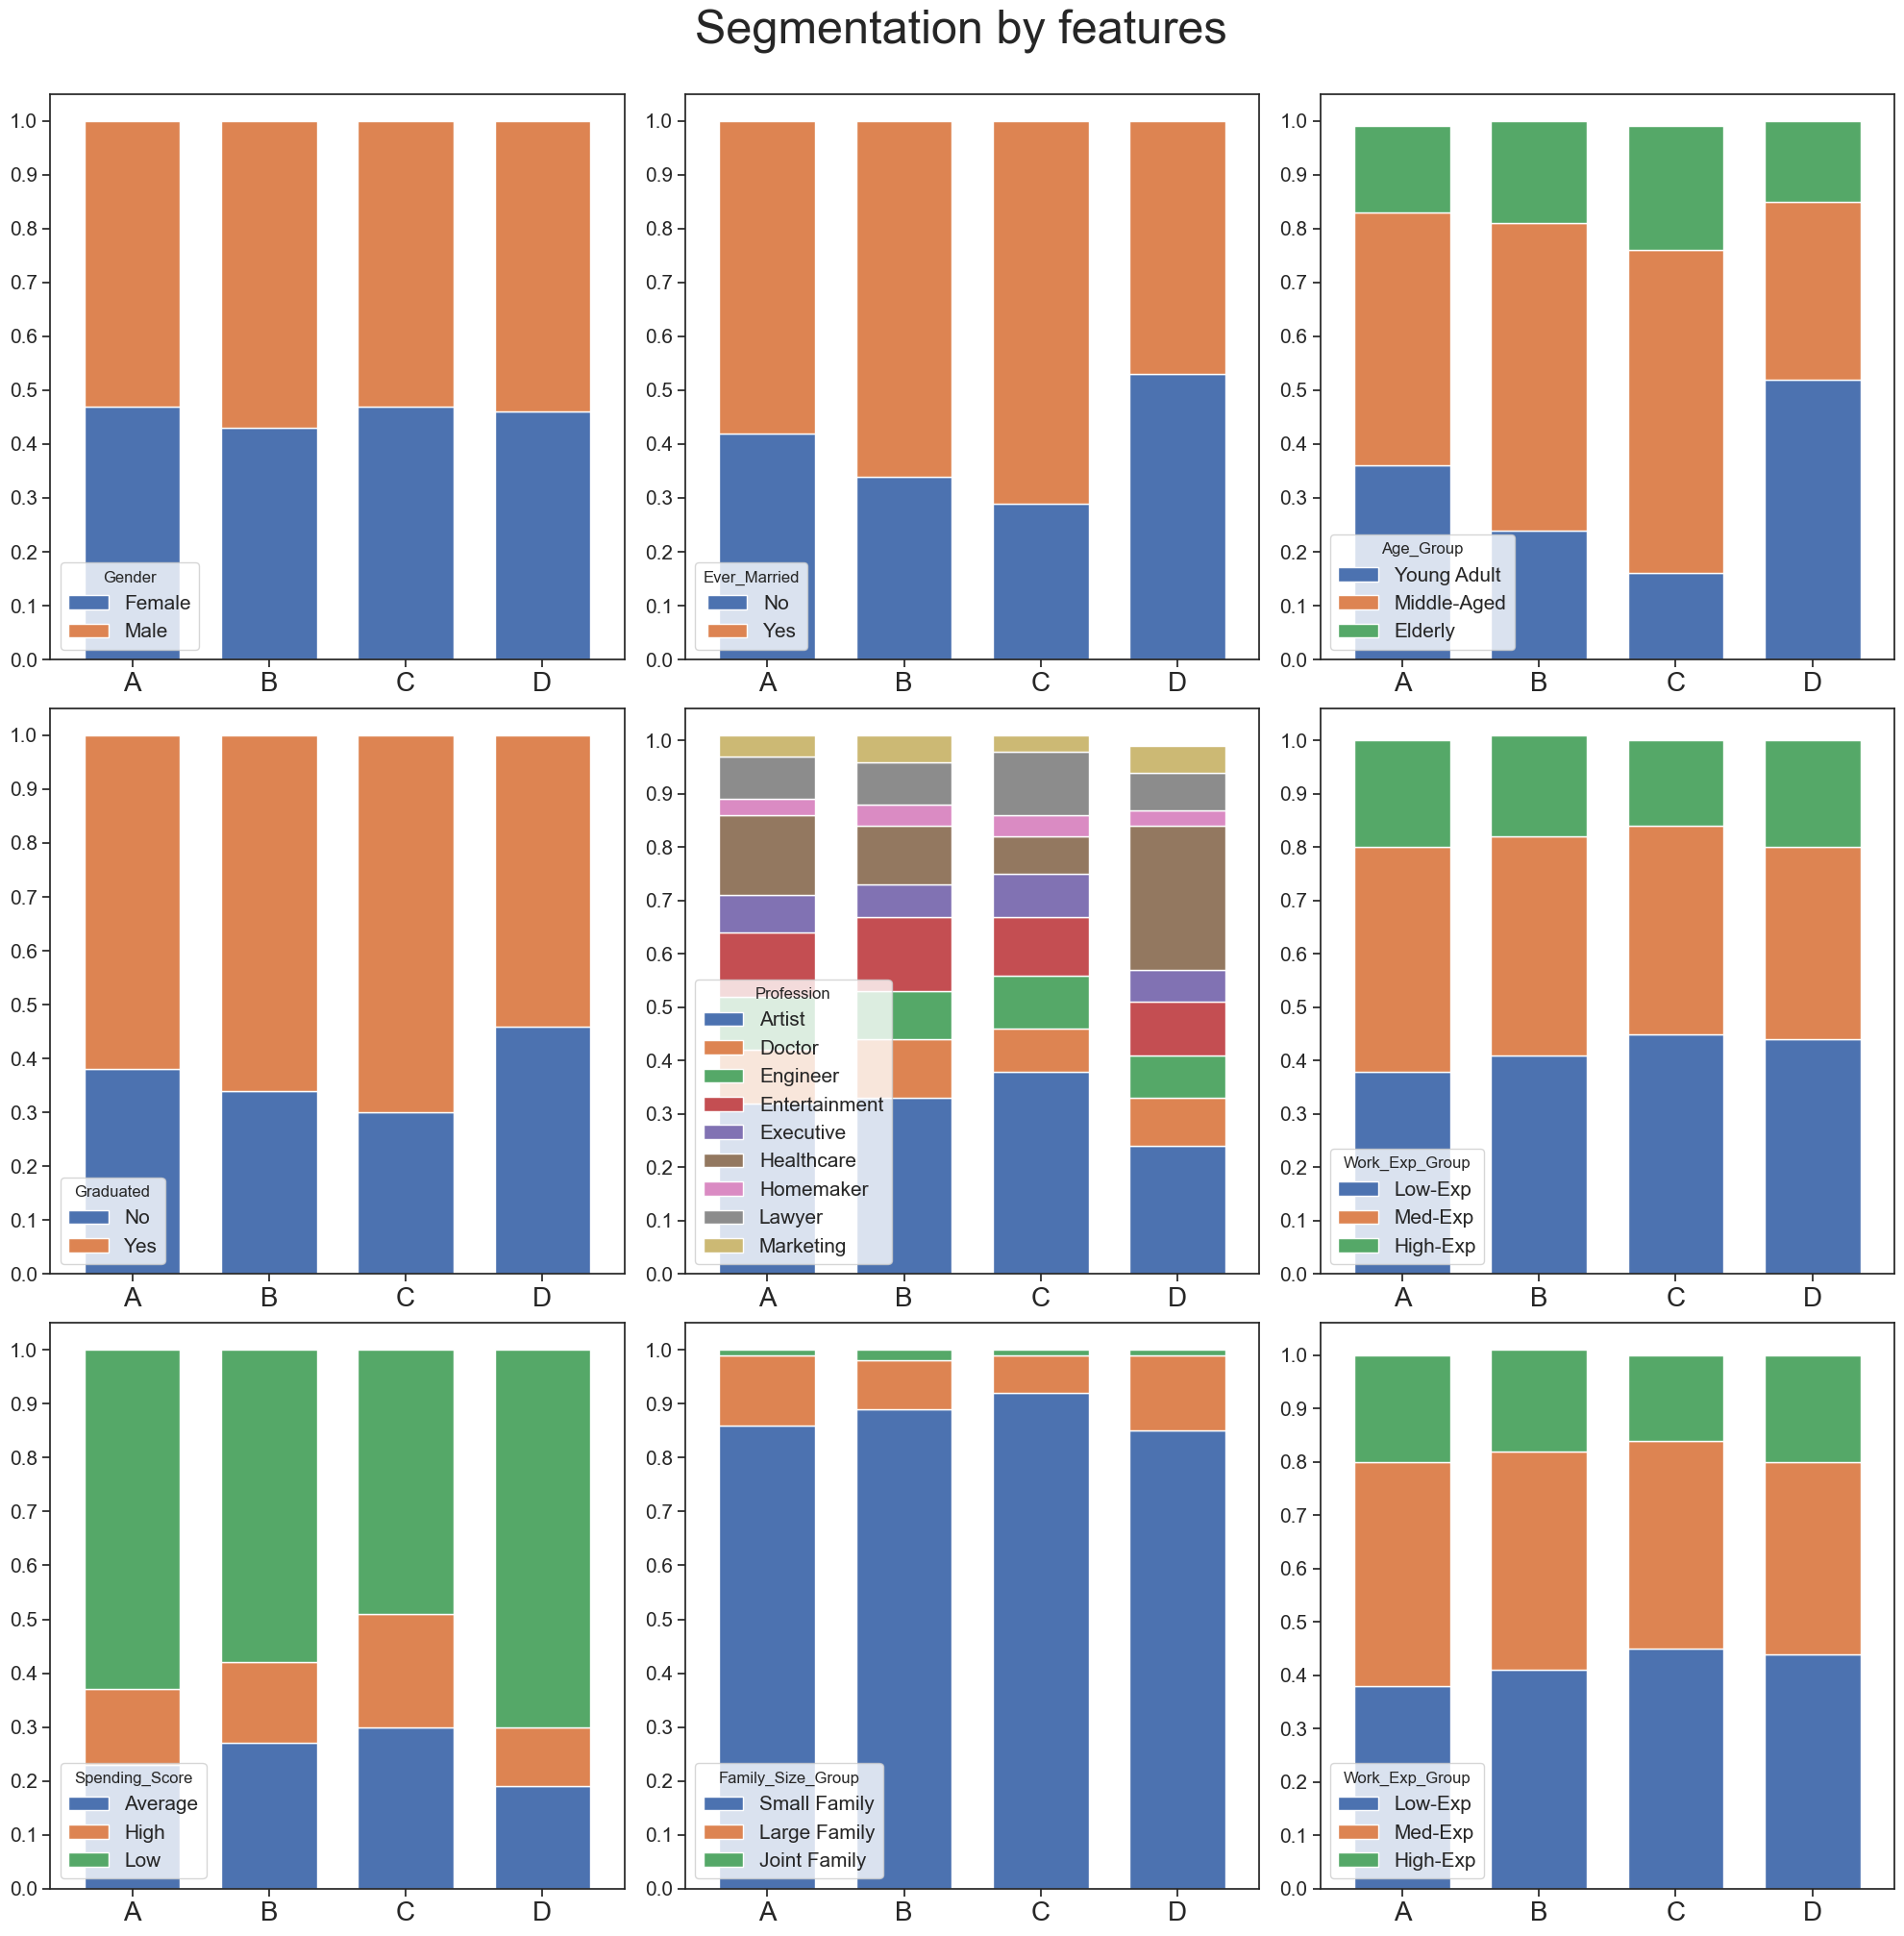

In [22]:
fig, ax =plt.subplots(3,3,figsize=(20,20))
ax=ax.flatten()
cols=['Gender','Ever_Married','Age_Group','Graduated','Profession','Work_Exp_Group','Spending_Score','Family_Size_Group','Work_Exp_Group','Var_1']
fig.subplots_adjust(hspace=0.1)
fig.subplots_adjust(wspace=0.1)
fig.suptitle("Segmentation by features",fontsize=35,y=1)
fig.tight_layout()



for i in range(9):
    ax2 = df.pivot_table(columns=cols[i],index='Segmentation',values='ID',aggfunc='count')
    ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)
    ax2.plot(kind="bar",ax = ax[i],stacked=True,width=0.7,yticks=list(np.arange(0,1.1,0.1).round(2)))
    #ax[i].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
    #ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    #ax[i].tick_params(labelsize=6)
    ax[i].legend(loc='lower left', fontsize=15,title=cols[i])
    plt.setp(ax[i].get_xticklabels(), rotation='horizontal', fontsize=20)
    plt.setp(ax[i].get_yticklabels(), rotation='horizontal', fontsize=15)

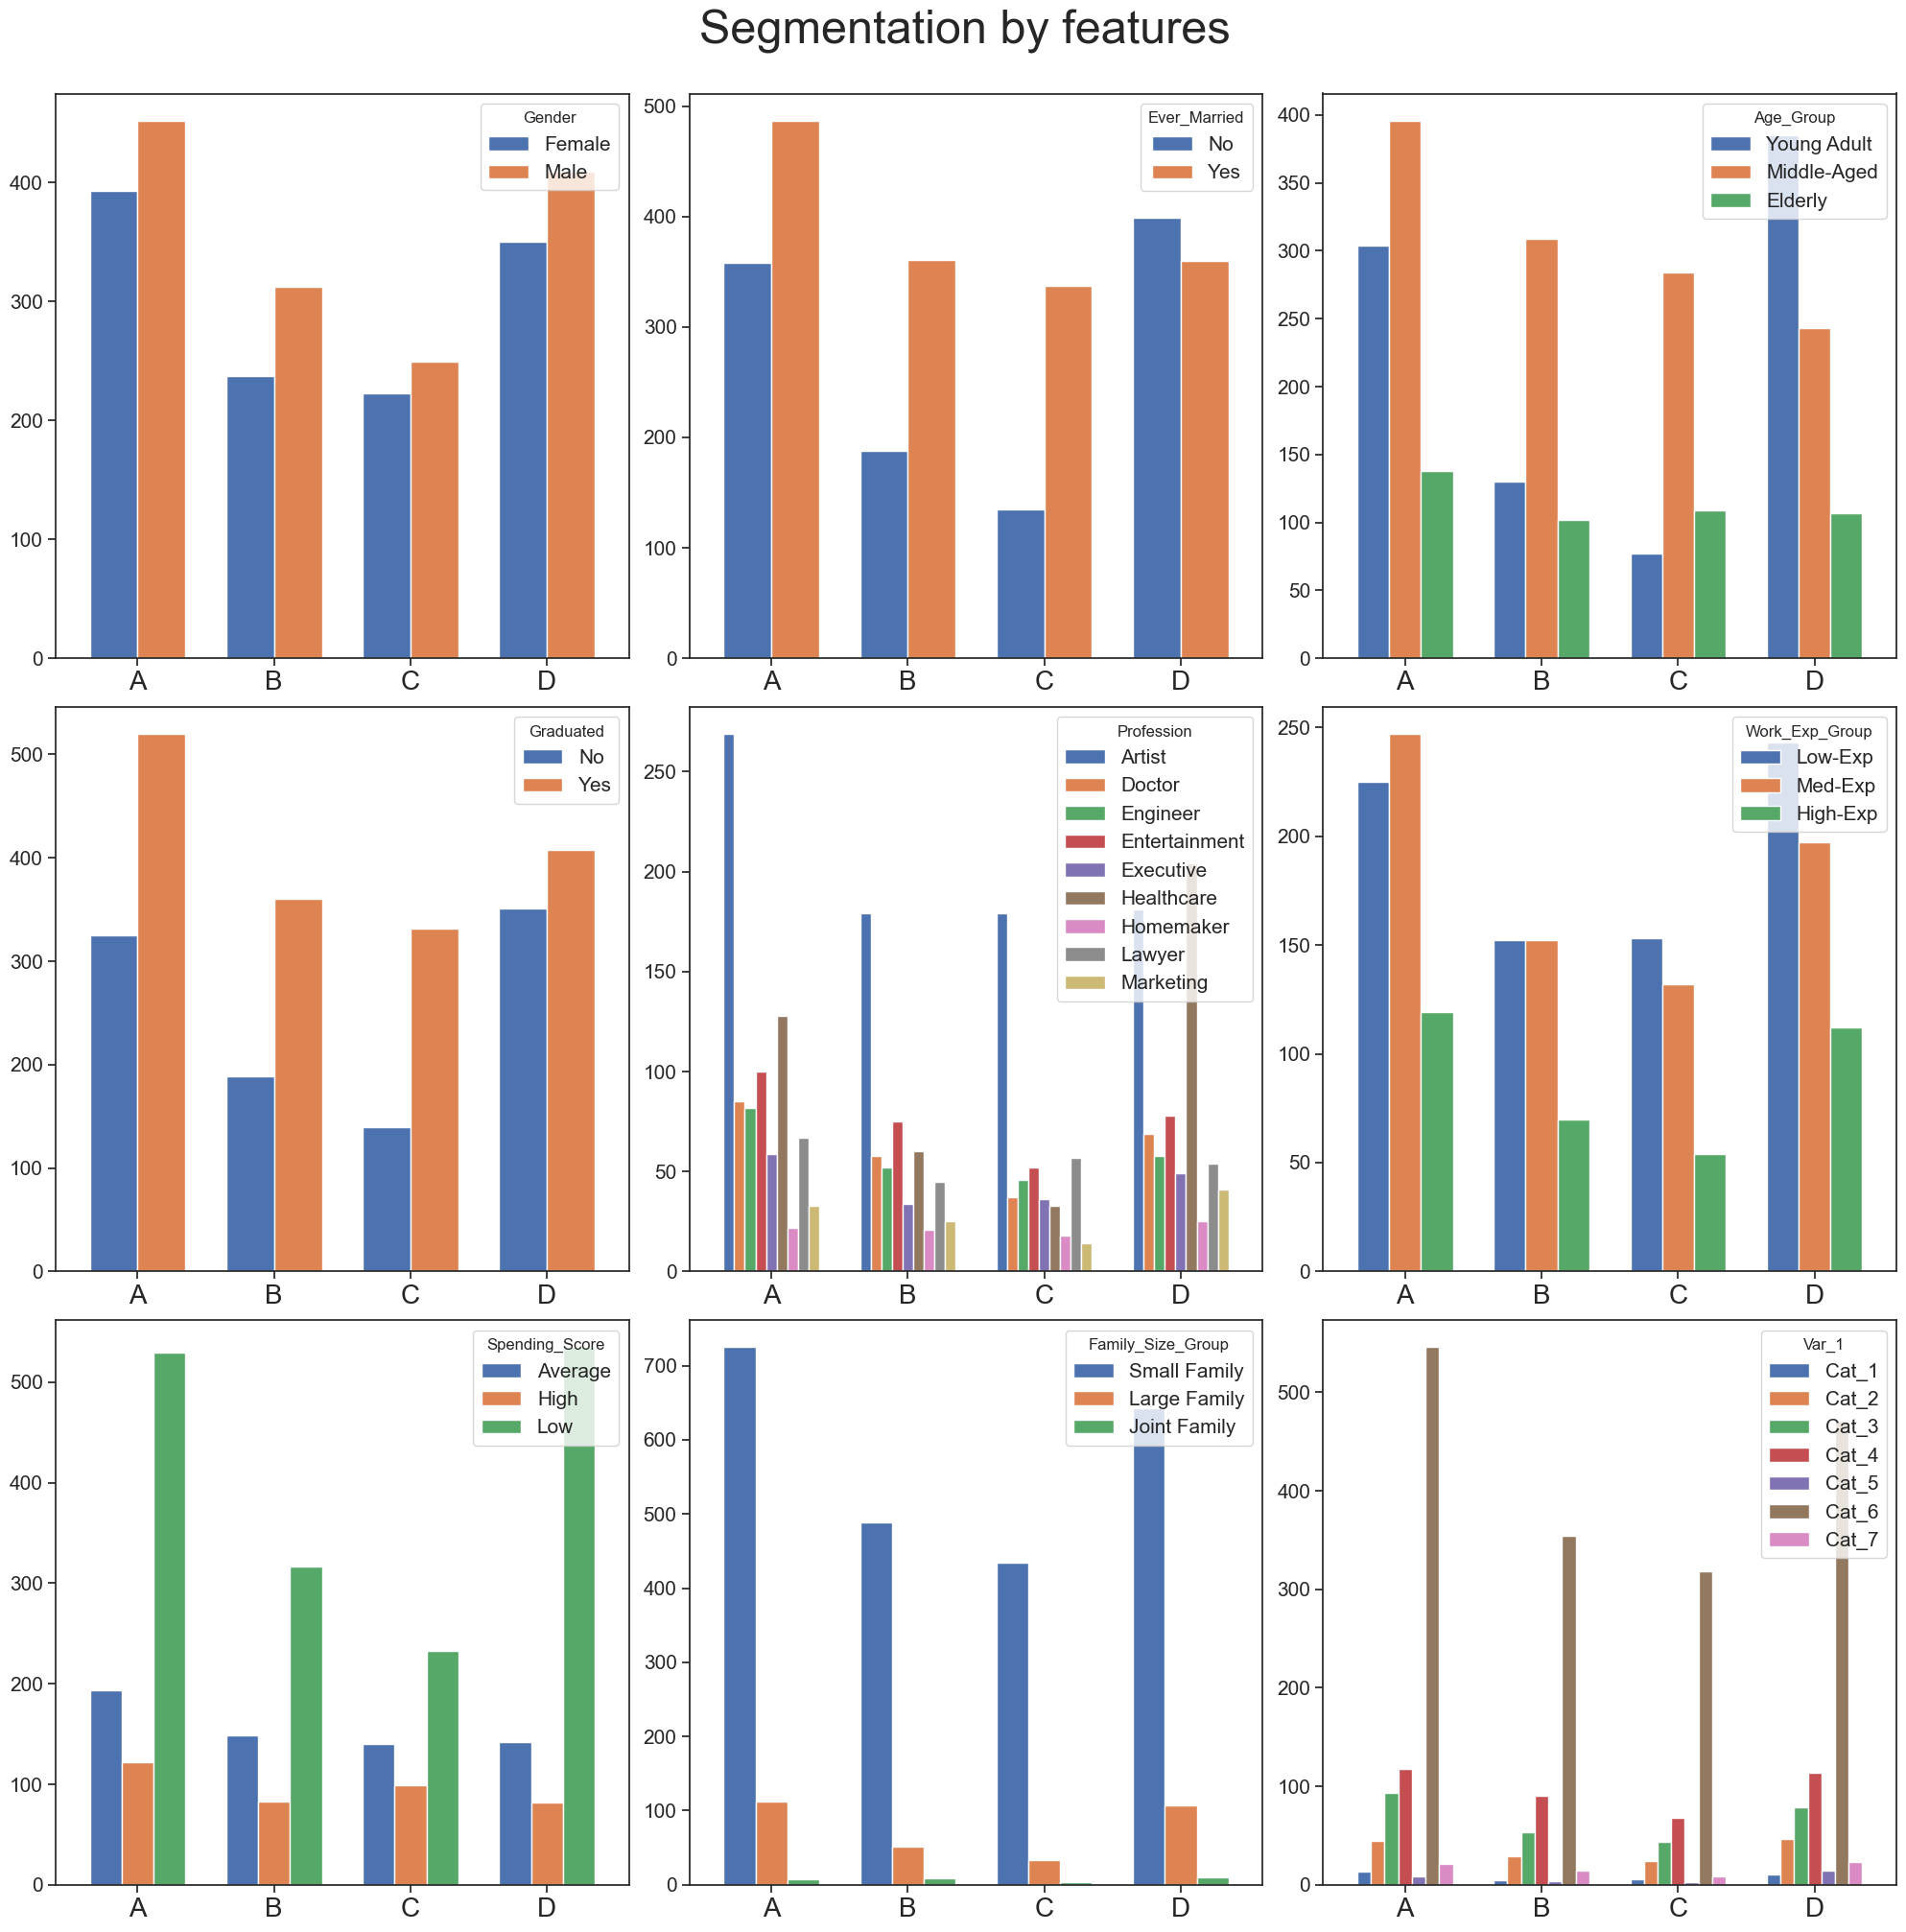

In [23]:
fig, ax =plt.subplots(3,3,figsize=(20,20))
ax=ax.flatten()
cols=['Gender','Ever_Married','Age_Group','Graduated','Profession','Work_Exp_Group','Spending_Score','Family_Size_Group','Var_1']
fig.subplots_adjust(hspace=0.05)
fig.subplots_adjust(wspace=0.05)
fig.suptitle("Segmentation by features",fontsize=35,y=1)
fig.tight_layout()



for i in range(9):
    ax1 = df.groupby(["Segmentation"])[cols[i]].value_counts().unstack().round(3)
    ax1.plot(kind="bar",ax = ax[i],width=0.7)
    #ax[i].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
    #ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    #ax[i].tick_params(labelsize=6)
    ax[i].legend(loc='upper right', fontsize=15,title=cols[i])
    plt.setp(ax[i].get_xticklabels(), rotation='horizontal', fontsize=20)
    plt.setp(ax[i].get_yticklabels(), rotation='horizontal', fontsize=15)

## Summary
### Gender

Segments are almost equally distributed between both genders, with segment D having a higher percentage of males compared to other genders
### Ever_Married

Most customers on segments 'A', 'B' and 'C' have married, except for category 'D' which has more singles than married. We could imply that younger adults haven't married yet.
### Age_Group

Young adults leader 'D' group, whereas middle-aged people do in the rest of the categories
### Graduated

Segment C contains most graduated professionals, whereas category 'D' has more non-graduates.
### Profession

Segment 'D' has more Healthcare workers, whereas the rest of the segments has more Artist.
### Work_Experience

Customers from segment 'A' and 'D' have higher work experience compared to rest, whereas segment 'C' has the lowest work experience.
### Spending Score

Segment 'D' has the lowest spending score, whereas segment 'C' slightly surpasses segment 'B'
### Family_Size

Segment 'D' has the highest family size, but most segments have small families (<4)
### Var_1

In most segments, 'Cat_6' proportion is higher, followed by 'Cat_4'

### Data preprocessing

In [24]:
def encode_dict(values):
    return {val:i for i,val in enumerate(values)}

In [25]:
gender_dict = encode_dict(df_model.Gender.unique())
ever_married_dict = encode_dict(df_model.Ever_Married.unique())
gra_dict = encode_dict(df_model.Graduated.unique())
profession_dict = encode_dict(df_model.Profession.unique())
spend_dict = encode_dict(df_model.Spending_Score.unique())
cat_dict = encode_dict(df_model.Var_1.unique())
segment_dict = encode_dict(df_model.Segmentation.unique())

In [26]:
encoded_dict = {
    'Gender': gender_dict,
    'Ever_Married': ever_married_dict,
    'Graduated': gra_dict,
    'Profession': profession_dict,
    'Spending_Score': spend_dict,
    'Var_1': cat_dict,
    'Segmentation': segment_dict
}

In [27]:
df_model.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [28]:
df_model = df_model.replace(encoded_dict)

In [29]:
df_model.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,0,0,36,0,0,0,0,1,0,0
1,458994,1,0,37,0,1,8,1,4,0,1
2,458996,0,0,69,1,1,0,0,1,0,1
3,459000,1,0,59,1,2,11,2,2,0,0
4,459001,0,1,19,1,3,2,0,4,0,1


### Modelling

In [30]:
X=df_model.drop(['ID','Segmentation'],axis=1)
y=df_model['Segmentation']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate=1, 

n_estimators=300,max_depth=3, min_samples_split=2, min_samples_leaf=1, 

subsample=1,max_features='sqrt', random_state=10)

In [33]:
gbc.fit(X,y)

GradientBoostingClassifier(learning_rate=1, max_features='sqrt',
                           n_estimators=300, random_state=10, subsample=1)

In [34]:
predictions=gbc.predict(X_test)

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 81   5   1   6]
 [  8 143   4  12]
 [  3   8  95   8]
 [  3   8   5 135]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        93
           1       0.87      0.86      0.86       167
           2       0.90      0.83      0.87       114
           3       0.84      0.89      0.87       151

    accuracy                           0.86       525
   macro avg       0.87      0.86      0.86       525
weighted avg       0.87      0.86      0.86       525

